In [1]:
# for test code convenience; Modified on June 27th

import netCDF4
from numpy import *
import matplotlib.pyplot as plt
import xarray as xr

# import PyNIO as Nio   #  deprecated
import pandas as pd
import glob
from copy import deepcopy
from scipy.stats import *
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.ticker as mticker
from matplotlib.colors import BoundaryNorm

from area_mean import *
from binned_cyFunctions5 import *
from read_hs_file import read_var_mod


from get_LWPCMIP6data import *
from fitLRM_cy1 import *
from fitLRM_cy2 import *
# from fitLRM_cy3 import *
from useful_func_cy import *
from calc_Radiation_LRM_1 import *

###*Save path definition*###

path1 = '/glade/scratch/chuyan/CMIP6_output/CMIP6_lrm_RESULT/'
path6 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/plot_file/plots_July9_CFMIP/'
### *   *####

exp = 'piControl'

AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCCSMCM2MR = {'modn': 'BCC-CSM2-MR', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CMCCCM2SR5 = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6', 
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCMFV2 = {'modn': 'CESM2-WACCM-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CNRMCM61 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMCM61HR = {'modn': 'CNRM-CM6-1-HR', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMESM21 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

ECEarth3 = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
ECEarth3Veg = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE22G = {'modn': 'GISS-E2-2-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
# HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
#             'exper': 'piControl', 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}   #..missing 'wap' in 'piControl' exp(Daniel says that HadGEM3-GC31 not using p-level, so doesn't have variables on p-level

INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6', 
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}  #..data not available again 
IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
MIROCES2L = {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NESM3 = {'modn': 'NESM3', 'consort': 'NUIST', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NorESM2MM = {'modn': 'NorESM2-MM', 'consort': 'NCC', 'cmip': 'cmip6',
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
SAM0 = {'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6', 
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
TaiESM1 = {'modn': 'TaiESM1', 'consort': 'AS-RCEC', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

deck2 = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM21, GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0, E3SM10, FGOALSg3, GFDLCM4, CAMSCSM1, INM_CM48, MPIESM12LR, AWICM11MR, CMCCCM2SR5, CESM2WACCMFV2, CNRMCM61, CNRMCM61HR, ECEarth3, ECEarth3Veg, GISSE22G, MIROCES2L, NESM3, NorESM2MM, TaiESM1]   #..current # 18 + 12
deck_nas2 = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM2', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0', 'E3SM10', 'FGOALSg3', 'GFDLCM4', 'CAMSCSM1', 'INM_CM48', 'MPIESM12LR', 'AWICM11MR', 'CMCCCM2SR5', 'CESM2WACCMFV2', 'CNRMCM61', 'CNRMCM61HR', 'ECEarth3', 'ECEarth3Veg', 'GISSE22G', 'MIROCES2L', 'NESM3', 'NorESM2MM', 'TaiESM1']

model_data = CESM2

# inputVar_pi, inputVar_abr = get_LWPCMIP6(**model_data)

In [10]:
# ******************************* #
#..get the shapes of monthly data
shape_lat = len(inputVar_pi['lat'])
shape_lon = len(inputVar_pi['lon'])
shape_time_pi = len(inputVar_pi['times'])
shape_time_abr = len(inputVar_abr['times'])
#print(shape_lat, shape_lon, shape_time_pi, shape_time_abr)


#..choose lat 40 -85 °S as the Southern-Ocean Regions
lons = inputVar_pi['lon'] *1.
lats = inputVar_pi['lat'][:] *1.

levels = array(inputVar_abr['pres'])
times_abr = inputVar_abr['times'] *1.
times_pi = inputVar_pi['times'] *1.

lati0 = -40.
latsi0= min(range(len(lats)), key = lambda i: abs(lats[i] - lati0))
lati1 = -85.
latsi1= min(range(len(lats)), key = lambda i: abs(lats[i] - lati1))
print('lat index for 40.s; 85.s', latsi0, latsi1)

shape_latSO =  (latsi0+1) - latsi1
#print(shape_latSO)


#..abrupt-4xCO2 Variables: LWP, tas(gmt), SST, (MC), p-e; SW radiation metrics
LWP_abr = array(inputVar_abr['clwvi']) - array(inputVar_abr['clivi'])   #..units in kg m^-2

gmt_abr = array(inputVar_abr['tas'])

SST_abr = array(inputVar_abr['sfc_T'])

Precip_abr = array(inputVar_abr['P']) * (24.*60.*60.)   #.. Precipitation. Convert the units from kg m^-2 s^-1 -> mm*day^-1
print('abr4x average Pr(mm/ day): ', nanmean(Precip_abr))   #.. IPSL/abr2.80..  CNRM ESM2 1/abr 2.69.. CESM2/abr 2.74..
Eva_abr = array(inputVar_abr['E']) * (24.*60.*60.)   #.. Evaporation, mm day^-1
print('abr4x average Evapor(mm/ day): ', nanmean(Eva_abr))         #.. IPSL/abr2.50..  CNRM ESM2 1/abr 2.43.. CESM2/abr 2.43..
MC_abr = Precip_abr - Eva_abr   #..Moisture Convergence calculated from abrupt4xCO2's P - E, Units in mm day^-1

Twp_abr = array(inputVar_abr['clwvi'])
Iwp_abr = array(inputVar_abr['clivi'])
prw_abr = array(inputVar_abr['prw'])

# SW radiation metrics
Rsdt_abr = array(inputVar_abr['rsdt'])
Rsut_abr = array(inputVar_abr['rsut'])
Rsutcs_abr = array(inputVar_abr['rsutcs'])
print("shape of data in 'abrupt-4xCO2':  ",  Rsut_abr.shape, " mean 'abrupt-4xCO2' upwelling SW radiation flux in the SO (Assume with cloud): ",  nanmean(Rsut_abr[:, latsi1:latsi0 +1,:]))
# print("shape of data in 'abrupt-4XCO2' exp:", Eva_abr.shape, 'abr4x mean-gmt(K): ', nanmean(gmt_abr))

# albedo, albedo_clear sky, albedo_cre: all-sky - clear-sky
Albedo_abr = Rsut_abr / Rsdt_abr
Albedo_cs_abr = Rsutcs_abr / Rsdt_abr
Alpha_cre_abr = Albedo_abr - Albedo_cs_abr


#..piControl Variables: LWP, tas(gmt), SST, (MC), p-e ; SW radiation metrics (rsdt, rsut, rsutcs)
LWP = array(inputVar_pi['clwvi']) - array(inputVar_pi['clivi'])   #..units in kg m^-2

gmt = array(inputVar_pi['tas'])

SST = array(inputVar_pi['sfc_T'])

Precip = array(inputVar_pi['P'])* (24.*60.*60.)    #..Precipitation. Convert the units from kg m^-2 s^-1 -> mm*day^-1
print('pi-C average Pr(mm/ day): ', nanmean(Precip))   #.. IPSL/piC 2.43..CNRM/piC 2.40.. CESM2/PIc 2.39
Eva = array(inputVar_pi['E']) * (24.*60.*60.)   #..evaporation, mm day^-1
print('pi-C average Evapor(mm/day): ', nanmean(Eva))   #.. IPSL/piC  2.21..CNRM/piC 2.20.. CESM2/PIc 2.17..
MC = Precip - Eva   #..Moisture Convergence calculated from pi-Control's P - E, Units in mm day^-1

Twp = array(inputVar_pi['clwvi'])
Iwp = array(inputVar_pi['clivi'])
prw_pi = array(inputVar_pi['prw'])

# SW radiation metrics
Rsdt_pi = array(inputVar_pi['rsdt'])
Rsut_pi = array(inputVar_pi['rsut'])
Rsutcs_pi = array(inputVar_pi['rsutcs'])
print("shape of data in 'piControl':  ", Rsut_pi.shape, " mean 'piControl' upwelling SW radiation flux in the SO (Assume with cloud): "
, nanmean(Rsut_pi[:, latsi1:latsi0 +1,:]))
# print("shape of data in 'piControl' data: ", Eva.shape, 'pi-C mean-gmt(K): ', nanmean(gmt))

# albedo, albedo_clear sky; albedo(alpha)_cre: all-sky - clear-sky
Albedo_pi = Rsut_pi / Rsdt_pi
Albedo_cs_pi = Rsutcs_pi / Rsdt_pi
Alpha_cre_pi = Albedo_pi - Albedo_cs_pi


#..abrupt-4xCO2
# Lower Tropospheric Stability (LTS):
k = 0.286

theta_700_abr = array(inputVar_abr['T_700']) * (100000./70000.)**k
theta_skin_abr = array(inputVar_abr['sfc_T']) * (100000./array(inputVar_abr['sfc_P']))**k 
LTS_m_abr = theta_700_abr - theta_skin_abr

#..Subtract the outliers in T_700 and LTS_m, 'nan' comes from missing T_700 data
LTS_e_abr = ma.masked_where(theta_700_abr >= 500, LTS_m_abr)

# Meteorology Subsidence at 500 hPa, units in Pa s^-1:
Subsidence_abr = array(inputVar_abr['sub'])

#.. piControl
# Lower Tropospheric Stability (LTS):
theta_700 = array(inputVar_pi['T_700']) * (100000./70000.)**k
theta_skin = array(inputVar_pi['sfc_T']) * (100000./array(inputVar_pi['sfc_P']))**k
LTS_m = theta_700 - theta_skin

#..Subtract the outliers in T_700 and LTS_m 
LTS_e = ma.masked_where(theta_700 >= 500, LTS_m)

#..Meteological Subsidence  at 500 hPa, units in Pa s^-1:
Subsidence = array(inputVar_pi['sub'])

# define Dictionary to store: CCFs(4), gmt, other variables :
dict0_PI_var = {'gmt': gmt, 'LWP': LWP, 'TWP': Twp, 'IWP': Iwp,  'PRW': prw_pi, 'SST': SST, 'p_e': MC, 'LTS': LTS_e, 'SUB': Subsidence, 'rsdt': Rsdt_pi, 'rsut': Rsut_pi, 'rsutcs': Rsutcs_pi, 'albedo' : Albedo_pi, 'albedo_cs': Albedo_cs_pi, 'alpha_cre': Alpha_cre_pi, 'lat': lats, 'lon': lons, 'times': times_pi, 'pres': levels}

dict0_abr_var = {'gmt': gmt_abr, 'LWP': LWP_abr, 'TWP': Twp_abr, 'IWP': Iwp_abr,  'PRW': prw_abr, 'SST': SST_abr, 'p_e': MC_abr, 'LTS': LTS_e_abr ,'SUB': Subsidence_abr, 'rsdt': Rsdt_abr, 'rsut': Rsut_abr, 'rsutcs': Rsutcs_abr, 'albedo': Albedo_abr, 'albedo_cs': Albedo_cs_abr, 'alpha_cre': Alpha_cre_abr, 'lat': lats, 'lon': lons, 'times': times_abr, 'pres': levels}



# get the Annual-mean, Southern-Ocean region arrays

datavar_nas = ['LWP', 'TWP', 'IWP', 'PRW', 'rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'alpha_cre', 'SST', 'p_e', 'LTS', 'SUB']   #..14 varisables except gmt (lon dimension diff)

dict1_PI_yr = {}
dict1_abr_yr = {}
shape_yr_pi = shape_time_pi//12
shape_yr_abr = shape_time_abr//12

layover_yr_abr = zeros((len(datavar_nas), shape_yr_abr, shape_latSO, shape_lon))
layover_yr_pi = zeros((len(datavar_nas), shape_yr_pi, shape_latSO, shape_lon))

layover_yr_abr_gmt = zeros((shape_yr_abr, shape_lat, shape_lon))
layover_yr_pi_gmt = zeros((shape_yr_pi, shape_lat, shape_lon))


for a in range(len(datavar_nas)):

    # a_array = dict0_abr_var[datavar_nas[a]]

    for i in range(shape_time_abr//12):
        layover_yr_abr[a, i,:,:] = nanmean(dict0_abr_var[datavar_nas[a]][i*12:(i+1)*12, latsi1:latsi0 +1,:], axis=0)

    dict1_abr_yr[datavar_nas[a]+'_yr'] = layover_yr_abr[a,:]


    # b_array = dict0_PI_var[datavar_nas[a]]
    for j in range(shape_time_pi//12):
        layover_yr_pi[a, j,:,:] = nanmean(dict0_PI_var[datavar_nas[a]][j*12:(j+1)*12, latsi1:latsi0 +1,:], axis=0)

    dict1_PI_yr[datavar_nas[a]+'_yr'] = layover_yr_pi[a,:]
    print(datavar_nas[a])

#print(dict1_PI_yr['LWP_yr'])

# gmt
for i in range(shape_time_abr//12):

    layover_yr_abr_gmt[i,:,:] = nanmean(dict0_abr_var['gmt'][i*12:(i+1)*12, :,:], axis=0)
dict1_abr_yr['gmt_yr'] = layover_yr_abr_gmt

for j in range(shape_time_pi//12):
    layover_yr_pi_gmt[j,:,:] = nanmean(dict0_PI_var['gmt'][j*12:(j+1)*12, :,:], axis=0)
dict1_PI_yr['gmt_yr'] = layover_yr_pi_gmt

# print(dict1_PI_yr['gmt_yr'])
dict0_PI_var['dict1_yr'] = dict1_PI_yr
dict0_abr_var['dict1_yr'] = dict1_abr_yr


# Calculate 5*5 bin array for variables (LWP, CCFs) in Sounthern Ocean Region:
#..set are-mean range and define functio
x_range = arange(-180., 180., 5.)  #..logitude sequences edge: number: 72
s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge: (36)
y_range = arange(-85, -40., 5.) +2.5  #..southern-ocaen latitude edge: 9 

# Annually variables in bin box:

lat_array = lats[latsi1:latsi0+1] *1.
lon_array = lons *1.
lat_array1 = lats *1.

dict1_PI_var = {}   #..add at Dec.30th, at 2021. Purpose: shrink the output savez data dictionary: rawdata
dict1_abr_var = {}   #..add at Dec.30th, at 2021. Purpose: shrink the output savez data dictionary: rawdata
dict1_yr_bin_PI = {}
dict1_yr_bin_abr = {}

for b in range(len(datavar_nas)):

    dict1_yr_bin_abr[datavar_nas[b]+'_yr_bin'] = binned_cySouthOcean5(dict1_abr_yr[datavar_nas[b]+'_yr'], lat_array, lon_array)
    dict1_yr_bin_PI[datavar_nas[b]+'_yr_bin'] = binned_cySouthOcean5(dict1_PI_yr[datavar_nas[b]+'_yr'], lat_array, lon_array)

# print(dict1_yr_bin_abr['PRW_yr_bin'].shape)
# print(dict1_yr_bin_abr['gmt_yr_bin'])  #..(150, 36, 73)
# print(dict1_yr_bin_PI['SUB_yr_bin'].shape)  #..(100, 10, 73)
dict1_yr_bin_abr['gmt_yr_bin'] = binned_cyGlobal5(dict1_abr_yr['gmt_yr'], lat_array1, lon_array)
dict1_yr_bin_PI['gmt_yr_bin'] = binned_cyGlobal5(dict1_PI_yr['gmt_yr'], lat_array1, lon_array)
print('gmt_yr_bin')

dict1_abr_var['dict1_yr_bin_abr'] = dict1_yr_bin_abr
dict1_PI_var['dict1_yr_bin_PI'] = dict1_yr_bin_PI

# Monthly variables (same as above):
dict1_mon_bin_PI = {}
dict1_mon_bin_abr = {}

for c in range(len(datavar_nas)):
    dict1_mon_bin_abr[datavar_nas[c]+'_mon_bin'] = binned_cySouthOcean5(dict0_abr_var[datavar_nas[c]][0:, latsi1:latsi0+1,:], lat_array, lon_array)
    dict1_mon_bin_PI[datavar_nas[c]+'_mon_bin'] = binned_cySouthOcean5(dict0_PI_var[datavar_nas[c]][0:, latsi1:latsi0+1,:], lat_array, lon_array)

dict1_mon_bin_abr['gmt_mon_bin'] = binned_cyGlobal5(dict0_abr_var['gmt'][0:,:,:], lat_array1, lon_array)
dict1_mon_bin_PI['gmt_mon_bin'] = binned_cyGlobal5(dict0_PI_var['gmt'][0:,:,:], lat_array1, lon_array)
print("Every month monthly data")

dict1_abr_var['dict1_mon_bin_abr'] = dict1_mon_bin_abr
dict1_PI_var['dict1_mon_bin_PI'] = dict1_mon_bin_PI


NameError: name 'inputVar_pi' is not defined

In [11]:
import cartopy.crs as ccrs   #..projection method
import cartopy.feature as cfeat
import matplotlib.ticker as mticker
from matplotlib import cm

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

### plotting

var = 'albedo_cs'

fig101 = plt.figure( figsize=(12, 10.5))

t_start = arange(0*12, 12*12, 12)
t_end = arange(0*12, 150*12, 12)

x = nanmean(dict0_abr_var[var][t_end, :,:], axis=0)
print(x.shape)

# print(lons, lats)

# Ploting for maps:
# begin plotting
X, Y = np.meshgrid(lons, lats)
proj = ccrs.PlateCarree()
ax101 = plt.subplot(111, projection = proj)

#..map attributes country border, coastline, Rivers, Lakes..
ax101.add_feature(cfeat.COASTLINE.with_scale('110m'), zorder=1, linewidth=0.8)
clevel = np.arange(0., 0.60, 0.0020)

contourf1 = ax101.contourf(X, Y, x, cmap = cm.bwr, levels = clevel, extend='both')  # predict_label_LWP_PI[t_PI,:,:]
cb1 = fig101.colorbar(contourf1, ax = ax101, orientation='vertical', label=r"$\Delta\ flux:\ '\alpha_{cre}'$", shrink=0.60, pad=0.03)
ax101.set_title(var+" : abrupt-4xCO2 change: last 12yrs - first 12yrs", fontsize = 13)

extent = [-180, 180, -90, 90]
gl = ax101.gridlines(crs = proj, draw_labels=True, linewidth = 0.8, color = 'k', alpha = 1.0, linestyle = '--', zorder = 99)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator(arange(extent[0], extent[1], 30.))
gl.ylocator = mticker.FixedLocator(arange(extent[2], extent[3], 10.))

# plt.savefig(path6+ "plotmap_" + var + "_abr_12yrschanges", dpi = 100)
plt.show(block = False)

NameError: name 'dict0_abr_var' is not defined

<Figure size 864x756 with 0 Axes>

In [2]:
# 12 model set


deck_nas  = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM2', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0']
#.. deck_nas  =    ['CESM2']
exp = 'piControl'

AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCCSMCM2MR = {'modn': 'BCC-CSM2-MR', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CMCCCM2SR5 = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6', 
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCMFV2 = {'modn': 'CESM2-WACCM-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CNRMCM61 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMCM61HR = {'modn': 'CNRM-CM6-1-HR', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMESM21 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

ECEarth3 = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
ECEarth3Veg = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE22G = {'modn': 'GISS-E2-2-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
# HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
#             'exper': 'piControl', 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}   #..missing 'wap' in 'piControl' exp(Daniel says that HadGEM3-GC31 not using p-level, so doesn't have variables on p-level

INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6', 
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}  #..data not available again 
IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
MIROCES2L = {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NESM3 = {'modn': 'NESM3', 'consort': 'NUIST', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NorESM2MM = {'modn': 'NorESM2-MM', 'consort': 'NCC', 'cmip': 'cmip6',
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
SAM0 = {'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6', 
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
TaiESM1 = {'modn': 'TaiESM1', 'consort': 'AS-RCEC', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

deck_nas  = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM2', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0']

(64152,)
(1, 37592)
0.5915949619653323
(195048,)
(1, 129792)
0.6654362003199212


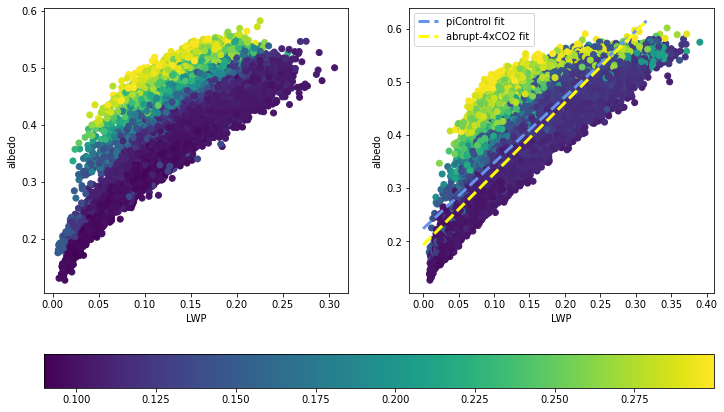

In [98]:
fig6, ax6 = plt.subplots(1, 2, figsize=(12, 7.5))

# Threshold of albedo_cs:
Thres_alpha_cs = 0.30

X1 = dict1_mon_bin_PI['LWP_mon_bin'][0::12,:,:].flatten()
Y1 = dict1_mon_bin_PI['albedo_mon_bin'][0::12,:,:].flatten()
Cc1 = dict1_mon_bin_PI['albedo_cs_mon_bin'][0::12,:,:].flatten()

ind1 = Cc1 >= Thres_alpha_cs  # < 0.7
ind_thres1 = np.logical_not(ind1)
print(ind1.shape)
print(np.array(np.nonzero(ind_thres1==True)).shape)
print(37952/64152)
rcr1 = ax6[0].scatter(X1[ind_thres1], Y1[ind_thres1], c = Cc1[ind_thres1])
ax6[0].set_xlabel("LWP")
ax6[0].set_ylabel("albedo")
# plt.colorbar(rcr1, ax= ax6[0], orientation ='horizontal')

X2 = dict1_mon_bin_abr['LWP_mon_bin'][0::12,:,:].flatten()
Y2 = dict1_mon_bin_abr['albedo_mon_bin'][0::12,:,:].flatten()
Cc2 = dict1_mon_bin_abr['albedo_cs_mon_bin'][0::12,:,:].flatten()

ind2 = Cc2 >= Thres_alpha_cs  # < 0.7
ind_thres2 = np.logical_not(ind2)
print(ind2.shape)
print(np.array(np.nonzero(ind_thres2==True)).shape)
print(129792/195048)
rcr2 = ax6[1].scatter(X2[ind_thres2], Y2[ind_thres2], c = Cc2[ind_thres2])
ax6[1].set_xlabel("LWP")
ax6[1].set_ylabel("albedo")
plt.colorbar(rcr2, ax= [ax6[0], ax6[1]], orientation ='horizontal')

# x = linspace(0.00, 0.315, 35)
# ax6[1].plot(x, coef_array_albedo_pi[0]*x + coef_array_albedo_pi[1], linestyle='--', color='cornflowerblue', linewidth=3.0, label="piControl fit")
# ax6[1].plot(x, coef_array_albedo_abr[0]*x + coef_array_albedo_abr[1], linestyle='--', color='yellow', linewidth=3.0, label="abrupt-4xCO2 fit")

plt.legend()
plt.show(block = False)
# plt.savefig("z_plot1")

In [80]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

data1 = pandas.DataFrame({'x1': X1[ind_thres1], 'y1': Y1[ind_thres1]})
data2 = pandas.DataFrame({'x2': X2[ind_thres2], 'y2': Y2[ind_thres2]})

# Fit the model
model1 = ols("y1 ~ x1", data1).fit()
model2 = ols("y2 ~ x2", data2).fit()
# print the summary

coef_array_albedo_pi = np.asarray([model1._results.params[1], model1._results.params[0]])
coef_array_albedo_abr = np.asarray([model2._results.params[1], model2._results.params[0]])
print(coef_array_albedo_pi)

print(coef_array_albedo_abr)

[1.24034738 0.22359507]
[1.33770531 0.19323122]


In [12]:
# Read Albedo_cre predicted data 

## PLot 1 # read data for ordinary, 1-lrm (not best):

# deck_nas2 = ['CESM2']
#.. 18 models now

# deck2 = [CESM2]

output_ARRAY = {}  # storage output file
output_intermedia = {}   # storage the 'rawdata_dict'

output_dict0_PI = {}
output_dict0_abr = {}

output_GMT =  {}
output_2lrm_predicted = {}  # dict, store annualy, area_meaned prediction of variables: LWP,IWP, rsut,rsut_lL, albedo,albedo_lL
output_2lrm_report = {}  # dict, store annually, area_meaned actual values of GCMs output: LWP, IWP, rsut, albedo
output_2lrm_coef_LWP = {}
output_2lrm_coef_alpha_cre = {}  # Coefficients of single regime albedo trained by report 'LWP' data
output_2lrm_coef_albedo = {}
output_2lrm_DxDtG = {}


# Report data: dictionaries
output_2lrm_yr_bin_abr = {}
output_2lrm_yr_bin_PI = {}
output_2lrm_mon_bin_abr = {}
output_2lrm_mon_bin_PI = {}   # above are 3d-strcture array
output_2lrm_flavra_abr = {}
output_2lrm_flavra_PI = {}   # were monthly data in 1-d

# Predicted data: currently 'albedo_lL'
output_2lrm_mon_bin_predi_PI = {}   # were monthly data in 1-d
output_2lrm_mon_bin_predi_abr = {}

# Statistic metrics for prediction: currently 'albedo_lL'


# Index for regime(s): Only for 2lrm
output_ind_Cold_PI = {}
output_ind_Hot_PI = {}
output_ind_Cold_abr = {}
output_ind_Hot_abr = {}

# Threshold conditions:
# Tr_sst = 271.79
for i in range(len(deck2)):
    folder_2lrm = glob.glob(path1+ deck2[i]['modn']+'_r2r1_hotcold(Jan)_(largestpiR2)_' +'*' +'_dats.npz')  # '_swrpredi(largestpiR2)_'
    print(folder_2lrm)
    # if len(folder_2lrm[1]) <  len(folder_2lrm[0]):
    #     folder_best2lrm = folder_2lrm[1]
    # else:
    #     folder_best2lrm = folder_2lrm[0]
    # print(folder_best2lrm)
    
    output_ARRAY[deck_nas2[i]] = load(str(folder_2lrm[0]), allow_pickle=True)
    # output_ARRAY[deck_nas2[i]] = load(str(folder_best2lrm), allow_pickle=True)
    
    output_intermedia[deck_nas2[i]] = output_ARRAY[deck_nas2[i]]['rawdata_dict']
    
    
    output_dict0_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['dict1_PI_var']
    output_dict0_abr[deck_nas2[i]]= output_intermedia[deck_nas2[i]][()]['dict1_abr_var']
    
    output_GMT[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['GMT']
    output_2lrm_predicted[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['predicted_metrics']
    output_2lrm_report[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['report_metrics']
    output_2lrm_coef_LWP[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Coef_dict']
    output_2lrm_coef_alpha_cre[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['coef_array_alpha_cre_pi']
    output_2lrm_coef_albedo[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['coef_array_albedo_pi']
    output_2lrm_DxDtG[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['dX_dTg']

print('Done read 2-LRM file(s)')

/glade/scratch/chuyan/CMIP6_output/CMIP6_lrm_RESULT/ {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6', 'exper': 'piControl', 'ensmem': 'r1i1p1f1', 'gg': 'gn', 'typevar': 'Amon'}
['/glade/scratch/chuyan/CMIP6_output/CMIP6_lrm_RESULT/BCC-ESM1_r2r1_hotcold(Jan)_(largestpiR2)_268.19_dats.npz']
['/glade/scratch/chuyan/CMIP6_output/CMIP6_lrm_RESULT/CanESM5_r2r1_hotcold(Jan)_(largestpiR2)_257.12_dats.npz']
['/glade/scratch/chuyan/CMIP6_output/CMIP6_lrm_RESULT/CESM2_r2r1_hotcold(Jan)_(largestpiR2)_269.19_dats.npz']
['/glade/scratch/chuyan/CMIP6_output/CMIP6_lrm_RESULT/CESM2-FV2_r2r1_hotcold(Jan)_(largestpiR2)_269.73_dats.npz']
['/glade/scratch/chuyan/CMIP6_output/CMIP6_lrm_RESULT/CESM2-WACCM_r2r1_hotcold(Jan)_(largestpiR2)_269.27_dats.npz']
['/glade/scratch/chuyan/CMIP6_output/CMIP6_lrm_RESULT/CNRM-ESM2-1_r2r1_hotcold(Jan)_(largestpiR2)_269.99_dats.npz']
['/glade/scratch/chuyan/CMIP6_output/CMIP6_lrm_RESULT/GISS-E2-1-G_r2r1_hotcold(Jan)_(largestpiR2)_273.96_dats.npz']
['/glade/scratch/ch

In [13]:
# read /partial_albedo / /partial_LWP and intercept
palbedo_pLWP = []
for i in range(len(deck2)):
    
    palbedo_pLWP.append(output_2lrm_coef_albedo[deck_nas2[i]][0])

In [10]:
print('month in piControl and abrupt-4xCO2: ', times_pi[0,:][1], times_abr[-1,:])

month in piControl and abrupt-4xCO2:  1.0 [301.   1.  15.]


In [ ]:
# inputVar_pi, inputVar_abr are the data from read module: get_CMIP6data.py


#..get the shapes of monthly data
shape_lat = len(inputVar_pi['lat'])
shape_lon = len(inputVar_pi['lon'])
shape_time_pi = len(inputVar_pi['times'])
shape_time_abr = len(inputVar_abr['times'])
#print(shape_lat, shape_lon, shape_time_pi, shape_time_abr)


#..choose lat 40 -85 °S as the Southern-Ocean Regions
lons = inputVar_pi['lon'] *1.
lats = inputVar_pi['lat'][:] *1.

levels = np.array(inputVar_abr['pres'])
times_pi = inputVar_pi['times'] *1.
times_abr = inputVar_abr['times'] *1.

lati1 = -40.
latsi1 = min(range(len(lats)), key = lambda i: abs(lats[i] - lati1))
lati0 = -85.
latsi0 = min(range(len(lats)), key = lambda i: abs(lats[i] - lati0))
print('lat index for -85S; -40S', latsi0, latsi1)

shape_latSO = (latsi1+1) - latsi0
print('shape of latitudinal index in raw data: ', shape_latSO)


# Read the Radiation data and LWP
# piControl and abrupt-4xCO2
# LWP
LWP_pi  = np.array(inputVar_pi['clwvi']) - np.array(inputVar_pi['clivi'])   #..units in kg m^-2
LWP_abr = np.array(inputVar_abr['clwvi']) - np.array(inputVar_abr['clivi'])   #..units in kg m^-2

# SW radiation metrics
Rsdt_pi = np.array(inputVar_pi['rsdt'])
Rsut_pi = np.array(inputVar_pi['rsut'])
Rsutcs_pi = np.array(inputVar_pi['rsutcs'])
print("shape of data in 'piControl':  ", Rsut_pi.shape, " mean 'piControl' upwelling SW radiation flux in the SO (Assume with cloud): "
, nanmean(Rsut_pi[:,latsi0:latsi1+1,:]))

Rsdt_abr = np.array(inputVar_abr['rsdt'])
Rsut_abr = np.array(inputVar_abr['rsut'])
Rsutcs_abr = np.array(inputVar_abr['rsutcs'])
print("shape of data in 'abrupt-4xCO2':  ",  Rsut_abr.shape, " mean 'abrupt-4xCO2' upwelling SW radiation flux in the SO (Assume with cloud): ",  nanmean(Rsut_abr[:,latsi0:latsi1+1,:]))

print(" mean |'abrupt-4xCO2' - 'piControl'| upwelling SW radiation flux (ALL-sky - Clear-sky) in the SO: ", 
      (nanmean(Rsut_abr[:,latsi0:latsi1+1,:] - Rsutcs_abr[:,latsi0:latsi1+1,:]) - nanmean(Rsut_pi[:,latsi0:latsi1+1,:] - Rsutcs_pi[:,latsi0:latsi1+1,:])))

# albedo, albedo_clear sky; albedo(alpha)_cre: all-sky - clear-sky
Albedo_pi = Rsut_pi / Rsdt_pi
Albedo_cs_pi = Rsutcs_pi / Rsdt_pi
Alpha_cre_pi = Albedo_pi - Albedo_cs_pi

Albedo_abr = Rsut_abr / Rsdt_abr
Albedo_cs_abr = Rsutcs_abr / Rsdt_abr
Alpha_cre_abr = Albedo_abr - Albedo_cs_abr
print(" mean |'abrupt-4xCO2' - 'piControl'| albedo (ALL-sky - Clear-sky) in the SO: ", 
      (nanmean(Alpha_cre_abr[:,latsi0:latsi1+1,:]) - nanmean(Alpha_cre_pi[:,latsi0:latsi1+1,:])))



# As data dictionary:
datavar_nas = ['LWP', 'rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'alpha_cre']   #..7 varisables except gmt (lon dimension diff)

dict0_PI_var = {'LWP': LWP_pi, 'rsdt': Rsdt_pi, 'rsut': Rsut_pi, 'rsutcs': Rsutcs_pi, 'albedo' : Albedo_pi, 'albedo_cs': Albedo_cs_pi, 'alpha_cre': Alpha_cre_pi, 'lat': lats, 'lon': lons, 'times': times_pi, 'pres': levels}

dict0_abr_var = {'LWP': LWP_abr, 'rsdt': Rsdt_abr, 'rsut': Rsut_abr, 'rsutcs': Rsutcs_abr, 'albedo': Albedo_abr, 'albedo_cs': Albedo_cs_abr, 'alpha_cre': Alpha_cre_abr, 'lat': lats, 'lon': lons, 'times': times_abr, 'pres': levels}

dict1_PI_var = deepcopy(dict0_PI_var)
dict1_abr_var = deepcopy(dict0_abr_var)

print('month in piControl and abrupt-4xCO2: ', times_pi[0,:][1], times_abr[0,:][1])

# Choose time frame: January
if times_pi[0,:][1] == 1.0:   # Jan
    shape_mon_PI_raw = dict0_PI_var['LWP'][0::12, latsi0:latsi1 +1,:].shape   # January data shape
    for i in range(len(datavar_nas)):
        dict1_PI_var[datavar_nas[i]] = dict1_PI_var[datavar_nas[i]][0::12, :, :]   # January data

else:
    shape_mon_PI_raw = dict0_PI_var['LWP'][0::12, latsi0:latsi1 +1,:].shape 
    for i in range(len(datavar_nas)):
        dict1_PI_var[datavar_nas[i]] = dict1_PI_var[datavar_nas[i]][0::12, :, :]

if times_abr[0,:][1] == 1.0:   # Jan
    shape_mon_abr_raw = dict0_abr_var['LWP'][0::12, latsi0:latsi1 +1,:].shape   # January data shape
    for j in range(len(datavar_nas)):
        dict1_abr_var[datavar_nas[j]] = dict1_abr_var[datavar_nas[j]][0::12, :, :]   # January data

else:
    shape_mon_abr_raw = dict0_abr_var['LWP'][0::12, latsi0:latsi1 +1,:].shape 
    for j in range(len(datavar_nas)):
        dict1_abr_var[datavar_nas[j]] = dict1_abr_var[datavar_nas[j]][0::12, :, :]


# Choose regional frame: SO (40 ~ 85 .S)
for k in range(len(datavar_nas)):
    dict1_PI_var[datavar_nas[k]] = dict1_PI_var[datavar_nas[k]][:, latsi0:latsi1+1, :]   # Southern Ocean data
    dict1_abr_var[datavar_nas[k]] = dict1_abr_var[datavar_nas[k]][:, latsi0:latsi1+1, :]  # Southern Ocean data


# radiative transfer model: single regime LRM:

# training (PI):

x_pi = dict1_PI_var['LWP'].flatten()
y_pi = dict1_PI_var['alpha_cre'].flatten()
y2_pi = dict1_PI_var['albedo'].flatten()
cs_pi = dict1_PI_var['albedo_cs'].flatten()


# rule out Land and Sea Ice: albedo_cs< = threshold_alpha:
ind_nolsi_pi = cs <= 0.30

data_pi = pandas.DataFrame({'x': x_pi[ind_nolsi_pi], 'y': y_pi[ind_nolsi_pi], 'y2': y2_pi[ind_nolsi_pi], 'cs': cs_pi[ind_nolsi_pi]})

# Fit the model
model1 = ols("y ~ x", data_pi).fit()
model2 = ols("y2 ~ x + cs", data_pi).fit()
# print the summary
print(model1.summary())
print(model2.summary())

coef_array_alpha_cre = np.asarray([model1._results.params[1], model1._results.params[0]])
coef_array_albedo = np.asarray([model2._results.params[1], model2._results.params[2], model2._results.params[0]])

# compare: (abrupt-4xCO2)

x_abr = dict1_abr_var['LWP'].flatten()
y_abr = dict1_abr_var['alpha_cre'].flatten()
y2_abr = dict1_abr_var['albedo'].flatten()
cs_abr = dict1_abr_var['albedo_cs'].flatten()


# rule out Land and Sea Ice: albedo_cs< = threshold_alpha:
ind_nolsi_abr = cs_abr <= 0.30

data_abr = pandas.DataFrame({'x': x_abr[ind_nolsi_abr], 'y': y_abr[ind_nolsi_abr], 'y2': y2_abr[ind_nolsi_abr], 'cs': cs_abr[ind_nolsi_abr]})

# Fit the model
model1_abr = ols("y ~ x", data_abr).fit()
model2_abr = ols("y2 ~ x + cs", data_abr).fit()
# print the summary
print(model1_abr.summary())
print(model2_abr.summary())


In [ ]:
# inputVar_pi, inputVar_abr are the data from read module: get_CMIP6data.py


#..get the shapes of monthly data
shape_lat = len(inputVar_pi['lat'])
shape_lon = len(inputVar_pi['lon'])
shape_time_pi = len(inputVar_pi['times'])
shape_time_abr = len(inputVar_abr['times'])
#print(shape_lat, shape_lon, shape_time_pi, shape_time_abr)


#..choose lat 40 -85 °S as the Southern-Ocean Regions
lons = inputVar_pi['lon'] *1.
lats = inputVar_pi['lat'][:] *1.

levels = np.array(inputVar_abr['pres'])
times_pi = inputVar_pi['times'] *1.
times_abr = inputVar_abr['times'] *1.

lati1 = -40.
latsi1 = min(range(len(lats)), key = lambda i: abs(lats[i] - lati1))
lati0 = -85.
latsi0 = min(range(len(lats)), key = lambda i: abs(lats[i] - lati0))
print('lat index for -85S; -40S', latsi0, latsi1)

shape_latSO = (latsi1+1) - latsi0
print('shape of latitudinal index in raw data: ', shape_latSO)


# Read the Radiation data and LWP
# piControl and abrupt-4xCO2
# LWP
LWP_pi  = np.array(inputVar_pi['clwvi']) - np.array(inputVar_pi['clivi'])   #..units in kg m^-2
LWP_abr = np.array(inputVar_abr['clwvi']) - np.array(inputVar_abr['clivi'])   #..units in kg m^-2

# SW radiation metrics
Rsdt_pi = np.array(inputVar_pi['rsdt'])
Rsut_pi = np.array(inputVar_pi['rsut'])
Rsutcs_pi = np.array(inputVar_pi['rsutcs'])
print("shape of data in 'piControl':  ", Rsut_pi.shape, " mean 'piControl' upwelling SW radiation flux in the SO (Assume with cloud): "
, nanmean(Rsut_pi[:,latsi0:latsi1+1,:]))

Rsdt_abr = np.array(inputVar_abr['rsdt'])
Rsut_abr = np.array(inputVar_abr['rsut'])
Rsutcs_abr = np.array(inputVar_abr['rsutcs'])
print("shape of data in 'abrupt-4xCO2':  ",  Rsut_abr.shape, " mean 'abrupt-4xCO2' upwelling SW radiation flux in the SO (Assume with cloud): ",  nanmean(Rsut_abr[:,latsi0:latsi1+1,:]))

print(" mean |'abrupt-4xCO2' - 'piControl'| upwelling SW radiation flux (ALL-sky - Clear-sky) in the SO: ", 
      (nanmean(Rsut_abr[:,latsi0:latsi1+1,:] - Rsutcs_abr[:,latsi0:latsi1+1,:]) - nanmean(Rsut_pi[:,latsi0:latsi1+1,:] - Rsutcs_pi[:,latsi0:latsi1+1,:])))

# albedo, albedo_clear sky; albedo(alpha)_cre: all-sky - clear-sky
Albedo_pi = Rsut_pi / Rsdt_pi
Albedo_cs_pi = Rsutcs_pi / Rsdt_pi
Alpha_cre_pi = Albedo_pi - Albedo_cs_pi

Albedo_abr = Rsut_abr / Rsdt_abr
Albedo_cs_abr = Rsutcs_abr / Rsdt_abr
Alpha_cre_abr = Albedo_abr - Albedo_cs_abr
print(" mean |'abrupt-4xCO2' - 'piControl'| albedo (ALL-sky - Clear-sky) in the SO: ", 
      (nanmean(Alpha_cre_abr[:,latsi0:latsi1+1,:]) - nanmean(Alpha_cre_pi[:,latsi0:latsi1+1,:])))



# As data dictionary:
datavar_nas = ['LWP', 'rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'alpha_cre']   #..7 varisables except gmt (lon dimension diff)

dict0_PI_var = {'LWP': LWP_pi, 'rsdt': Rsdt_pi, 'rsut': Rsut_pi, 'rsutcs': Rsutcs_pi, 'albedo' : Albedo_pi, 'albedo_cs': Albedo_cs_pi, 'alpha_cre': Alpha_cre_pi, 'lat': lats, 'lon': lons, 'times': times_pi, 'pres': levels}

dict0_abr_var = {'LWP': LWP_abr, 'rsdt': Rsdt_abr, 'rsut': Rsut_abr, 'rsutcs': Rsutcs_abr, 'albedo': Albedo_abr, 'albedo_cs': Albedo_cs_abr, 'alpha_cre': Alpha_cre_abr, 'lat': lats, 'lon': lons, 'times': times_abr, 'pres': levels}

dict1_PI_var = deepcopy(dict0_PI_var)
dict1_abr_var = deepcopy(dict0_abr_var)

print('month in piControl and abrupt-4xCO2: ', times_pi[0,:][1], times_abr[0,:][1])

# Choose time frame: January
if times_pi[0,:][1] == 1.0:   # Jan
    shape_mon_PI_raw = dict0_PI_var['LWP'][0::12, latsi0:latsi1 +1,:].shape   # January data shape
    for i in range(len(datavar_nas)):
        dict1_PI_var[datavar_nas[i]] = dict1_PI_var[datavar_nas[i]][0::12, :, :]   # January data

else:
    shape_mon_PI_raw = dict0_PI_var['LWP'][0::12, latsi0:latsi1 +1,:].shape 
    for i in range(len(datavar_nas)):
        dict1_PI_var[datavar_nas[i]] = dict1_PI_var[datavar_nas[i]][0::12, :, :]

if times_abr[0,:][1] == 1.0:   # Jan
    shape_mon_abr_raw = dict0_abr_var['LWP'][0::12, latsi0:latsi1 +1,:].shape   # January data shape
    for j in range(len(datavar_nas)):
        dict1_abr_var[datavar_nas[j]] = dict1_abr_var[datavar_nas[j]][0::12, :, :]   # January data

else:
    shape_mon_abr_raw = dict0_abr_var['LWP'][0::12, latsi0:latsi1 +1,:].shape 
    for j in range(len(datavar_nas)):
        dict1_abr_var[datavar_nas[j]] = dict1_abr_var[datavar_nas[j]][0::12, :, :]


# Choose regional frame: SO (40 ~ 85 .S)
for k in range(len(datavar_nas)):
    dict1_PI_var[datavar_nas[k]] = dict1_PI_var[datavar_nas[k]][:, latsi0:latsi1+1, :]   # Southern Ocean data
    dict1_abr_var[datavar_nas[k]] = dict1_abr_var[datavar_nas[k]][:, latsi0:latsi1+1, :]  # Southern Ocean data


# radiative transfer model: single regime LRM:

# training (PI):

x = dict1_PI_var['LWP'].flatten()
y = dict1_PI_var['alpha_cre'].flatten()
y2 = dict1_PI_var['albedo'].flatten()
cs = dict1_PI_var['albedo_cs'].flatten()


# rule out Land and Sea Ice: albedo_cs< = threshold_alpha:
ind_nolsi = cs <=0.40

data = pandas.DataFrame({'x': x[ind_nolsi], 'y': y[ind_nolsi], 'y2': y2[ind_nolsi], 'cs': cs[ind_nolsi]})

# Fit the model
model1 = ols("y ~ x", data).fit()
model2 = ols("y2 ~ x + cs", data).fit()
# print the summary
print(model1.summary())
print(model2.summary())

print(np.asarray([model1._results.params[1], model1._results.params[0]]))
print(np.asarray([model2._results.params[1], model2._results.params[2], model2._results.params[0]])) 


In [7]:
# histogram of transition Temperature, Threshold_SUB @ 500mb

deck = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM21, GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0, E3SM10, FGOALSg3, GFDLCM4, CAMSCSM1, INM_CM48, MPIESM12LR, AWICM11MR, CMCCCM2SR5, CESM2WACCMFV2, CNRMCM61, CNRMCM61HR, ECEarth3, ECEarth3Veg, GISSE22G, MIROCES2L, NESM3, NorESM2MM, TaiESM1]   #..current # 18 + 12

deck_nas = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM2', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0', 'E3SM10', 'FGOALSg3', 'GFDLCM4', 'CAMSCSM1', 'INM_CM48', 'MPIESM12LR', 'AWICM11MR', 'CMCCCM2SR5', 'CESM2WACCMFV2', 'CNRMCM61', 'CNRMCM61HR', 'ECEarth3', 'ECEarth3Veg', 'GISSE22G', 'MIROCES2L', 'NESM3', 'NorESM2MM', 'TaiESM1']
#.. current model #: 18 + 12 (except: '19')

deck_nas21 = ['BCCESM1', 'CESM2', 'CESM2WACCM', 'CNRMESM2', 'GISSE21G', 'IPSLCM6ALR','MIROC6']
# T5050 model
deck_nas22 = ['BCC-CSM2-MR', 'CESM2', 'CESM2-WACCM', 'CNRM-ESM2-1', 'GISS-E2-1-G', 'IPSL-CM6A-LR', 'MIROC6']   #..current #18
WD = '/glade/scratch/chuyan/CMIP6_output/'
WD_t5050 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test5/'
WD_plot = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/plot_file/plots_July9_CFMIP/'

TR_sst1 = []
TR_sub1 = []
T5050 = []
TR_sst2 = []
TR_sub2 = []

for N_of_model in range(len(deck)):
    folder = glob.glob(WD+ deck_nas[N_of_model]+'__'+ 'STAT_pi+abr_'+'22x_31y'+'.npz')
    # print(folder)
    output_ARRAY =  np.load(folder[0], allow_pickle=True)  # str(TR_sst)
    TR_sst1 = np.append(TR_sst1, output_ARRAY['TR_maxR2_SST'])
    TR_sub1 = np.append(TR_sub1, output_ARRAY['TR_maxR2_SUB'])
    TR_sst2 = np.append(TR_sst2, output_ARRAY['TR_minabias_SST'])
    TR_sub2 = np.append(TR_sub2, output_ARRAY['TR_minabias_SUB'])
    
print(TR_sst1, TR_sst1.shape)

for N_of_model2 in range(1):
    folder_T5050 = glob.glob(WD_t5050+'T5050/' + deck_nas22[N_of_model2] + '_'+'r1i1p1f*' + '.npz')
    output_ARRAY_T5050 = np.load(folder_T5050[0], allow_pickle=True, encoding = 'latin1')  # str(TR_sst)
    
    SH = output_ARRAY_T5050['SH']
    # print(SH)
    # print(SH)



[268.18509562 257.1203922  269.18537708 269.73194182 269.27179887
 269.98660457 273.95773777 272.79536598 265.97858194 248.21785152
 267.78788104 269.31601733 269.15500316 269.87731394 258.39216763
 268.95829839 261.94534403 267.62652787 267.89435273 268.6053831
 269.85284061 268.89226127 259.93590584 264.26564009 264.2045001
 269.09522665 256.42604748 270.62113761 270.03390419 269.40830038] (30,)


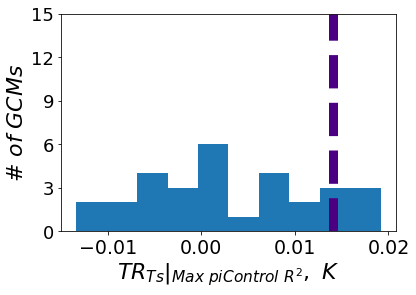

In [8]:
parameters = {'axes.labelsize': 22, 'xtick.labelsize': 19, 'ytick.labelsize': 18}
plt.rcParams.update(parameters)


plt.hist(TR_sub1)

plt.xlabel(r"$TR_{Ts}|_{Max\ piControl\ R^{2}}, \ K$")  # \omega_{500}, Pa\ s^{-1}$
plt.ylabel(r"$ \#\ of\ GCMs$")
plt.yticks(ticks = np.arange(0, 16, 3), label = np.arange(0, 16, 3))
# plt.yticks(ticks = np.arange(0, 7, 2), label = np.arange(0, 7, 2))
plt.axvline(TR_sub1[2], linestyle = '--', linewidth = 9, color = 'indigo')
# plt.savefig(path6+'Histogram_TR_SST.jpg', bbox_inches='tight', dpi = 150)

In [ ]:
# inputVar_pi, inputVar_abr are the data from read module: get_CMIP6data.py
TR_albedo = 0.15

# inputVar_pi, inputVar_abr are the data from read module: get_CMIP6data.py


#..get the shapes of monthly data
shape_lat = len(inputVar_pi['lat'])
shape_lon = len(inputVar_pi['lon'])
shape_time_pi = len(inputVar_pi['times'])
shape_time_abr = len(inputVar_abr['times'])
#print(shape_lat, shape_lon, shape_time_pi, shape_time_abr)


#..choose lat 40 -85 °S as the Southern-Ocean Regions
lons = inputVar_pi['lon'] *1.
lats = inputVar_pi['lat'][:] *1.

levels = np.array(inputVar_abr['pres'])
times_pi = inputVar_pi['times'] *1.
times_abr = inputVar_abr['times'] *1.

lati1 = -40.

latsi1 = min(range(len(lats)), key = lambda i: abs(lats[i] - lati1))
lati0 = -85.
latsi0 = min(range(len(lats)), key = lambda i: abs(lats[i] - lati0))
print('lat index for -85S; -40S', latsi0, latsi1)

shape_latSO = (latsi1+1) - latsi0
print('shape of latitudinal index in raw data: ', shape_latSO)


# Read the Radiation data and LWP
# piControl and abrupt-4xCO2
# LWP
LWP_pi  = np.array(inputVar_pi['clwvi']) - np.array(inputVar_pi['clivi'])   #..units in kg m^-2
LWP_abr = np.array(inputVar_abr['clwvi']) - np.array(inputVar_abr['clivi'])   #..units in kg m^-2

# SW radiation metrics
Rsdt_pi = np.array(inputVar_pi['rsdt'])
Rsut_pi = np.array(inputVar_pi['rsut'])
Rsutcs_pi = np.array(inputVar_pi['rsutcs'])
print("shape of data in 'piControl':  ", Rsut_pi.shape, " mean 'piControl' upwelling SW radiation flux in the SO (Assume with cloud): "
, nanmean(Rsut_pi[:,latsi0:latsi1+1,:]))

Rsdt_abr = np.array(inputVar_abr['rsdt'])
Rsut_abr = np.array(inputVar_abr['rsut'])
Rsutcs_abr = np.array(inputVar_abr['rsutcs'])
print("shape of data in 'abrupt-4xCO2':  ",  Rsut_abr.shape, " mean 'abrupt-4xCO2' upwelling SW radiation flux in the SO (Assume with cloud): ",  nanmean(Rsut_abr[:,latsi0:latsi1+1,:]))

print(" mean |'abrupt-4xCO2' - 'piControl'| upwelling SW radiation flux (ALL-sky - Clear-sky) in the SO: ", 
      (nanmean(Rsut_abr[:,latsi0:latsi1+1,:] - Rsutcs_abr[:,latsi0:latsi1+1,:]) - nanmean(Rsut_pi[:,latsi0:latsi1+1,:] - Rsutcs_pi[:,latsi0:latsi1+1,:])))

# albedo, albedo_clear sky; albedo(alpha)_cre: all-sky - clear-sky
Albedo_pi = Rsut_pi / Rsdt_pi
Albedo_cs_pi = Rsutcs_pi / Rsdt_pi
Alpha_cre_pi = Albedo_pi - Albedo_cs_pi

Albedo_abr = Rsut_abr / Rsdt_abr
Albedo_cs_abr = Rsutcs_abr / Rsdt_abr
Alpha_cre_abr = Albedo_abr - Albedo_cs_abr
print(" mean |'abrupt-4xCO2' - 'piControl'| albedo (ALL-sky - Clear-sky) in the SO: ", 
      (nanmean(Alpha_cre_abr[:,latsi0:latsi1+1,:]) - nanmean(Alpha_cre_pi[:,latsi0:latsi1+1,:])))



# As data dictionary:
datavar_nas = ['LWP', 'rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'alpha_cre']   #..7 varisables except gmt (lon dimension diff)

dict0_PI_var = {'LWP': LWP_pi, 'rsdt': Rsdt_pi, 'rsut': Rsut_pi, 'rsutcs': Rsutcs_pi, 'albedo' : Albedo_pi, 'albedo_cs': Albedo_cs_pi, 'alpha_cre': Alpha_cre_pi, 'lat': lats, 'lon': lons, 'times': times_pi, 'pres': levels}

dict0_abr_var = {'LWP': LWP_abr, 'rsdt': Rsdt_abr, 'rsut': Rsut_abr, 'rsutcs': Rsutcs_abr, 'albedo': Albedo_abr, 'albedo_cs': Albedo_cs_abr, 'alpha_cre': Alpha_cre_abr, 'lat': lats, 'lon': lons, 'times': times_abr, 'pres': levels}

dict1_PI_var = deepcopy(dict0_PI_var)
dict1_abr_var = deepcopy(dict0_abr_var)

print('month in piControl and abrupt-4xCO2: ', times_pi[0,:][1], times_abr[0,:][1])

# Choose time frame: January
if times_pi[0,:][1] == 1.0:   # Jan
    shape_mon_PI_raw = dict0_PI_var['LWP'][0::12, latsi0:latsi1 +1,:].shape   # January data shape
    for i in range(len(datavar_nas)):
        dict1_PI_var[datavar_nas[i]] = dict1_PI_var[datavar_nas[i]][0::12, :, :]   # January data

else:
    shape_mon_PI_raw = dict0_PI_var['LWP'][int(13 - times_pi[0,:][1])::12, latsi0:latsi1 +1,:].shape 
    for i in range(len(datavar_nas)):
        dict1_PI_var[datavar_nas[i]] = dict1_PI_var[datavar_nas[i]][int(13 - times_pi[0,:][1])::12, :, :]

if times_abr[0,:][1] == 1.0:   # Jan
    shape_mon_abr_raw = dict0_abr_var['LWP'][0::12, latsi0:latsi1 +1,:].shape   # January data shape
    for j in range(len(datavar_nas)):
        dict1_abr_var[datavar_nas[j]] = dict1_abr_var[datavar_nas[j]][0::12, :, :]   # January data

else:
    shape_mon_abr_raw = dict0_abr_var['LWP'][int(13 - times_abr[0,:][1])::12, latsi0:latsi1 +1,:].shape 
    for j in range(len(datavar_nas)):
        dict1_abr_var[datavar_nas[j]] = dict1_abr_var[datavar_nas[j]][int(13 - times_abr[0,:][1])::12, :, :]


# Choose regional frame: SO (40 ~ 85 .S)
for k in range(len(datavar_nas)):
    dict1_PI_var[datavar_nas[k]] = dict1_PI_var[datavar_nas[k]][:, latsi0:latsi1+1, :]   # Southern Ocean data
    dict1_abr_var[datavar_nas[k]] = dict1_abr_var[datavar_nas[k]][:, latsi0:latsi1+1, :]  # Southern Ocean data


# radiative transfer model: single regime LRM:

# training (PI):

x_pi = dict1_PI_var['LWP'].flatten()
y_pi = dict1_PI_var['alpha_cre'].flatten()
y2_pi = dict1_PI_var['albedo'].flatten()
cs_pi = dict1_PI_var['albedo_cs'].flatten()


# rule out Land and Sea Ice: albedo_cs< = threshold_alpha:
ind_nolsi_pi = cs_pi <= TR_albedo
print("albedo < "+ str(TR_albedo), " ratio in 'piCl': "+str(asarray(nonzero(ind_nolsi_pi == True)).shape[1] / ind_nolsi_pi.shape[0]))
data_pi = pandas.DataFrame({'x': x_pi[ind_nolsi_pi], 'y': y_pi[ind_nolsi_pi], 'y2': y2_pi[ind_nolsi_pi], 'cs': cs_pi[ind_nolsi_pi]})

# Fit the model
model1 = ols("y ~ x", data_pi).fit()
model2 = ols("y2 ~ x + cs", data_pi).fit()
# print the summary
print(model1.summary())
print(model2.summary())

coef_array_alpha_cre_pi = np.asarray([model1._results.params[1], model1._results.params[0]])
coef_array_albedo_pi = np.asarray([model2._results.params[1], model2._results.params[2], model2._results.params[0]])

# compare: (abrupt-4xCO2)

x_abr = dict1_abr_var['LWP'].flatten()
y_abr = dict1_abr_var['alpha_cre'].flatten()
y2_abr = dict1_abr_var['albedo'].flatten()
cs_abr = dict1_abr_var['albedo_cs'].flatten()


# rule out Land and Sea Ice: albedo_cs< = threshold_alpha:
ind_nolsi_abr = cs_abr <= TR_albedo
print("albedo < "+ str(TR_albedo), " ratio in 'abr4x': "+str(asarray(nonzero(ind_nolsi_abr == True)).shape[1] / ind_nolsi_abr.shape[0]))
data_abr = pandas.DataFrame({'x': x_abr[ind_nolsi_abr], 'y': y_abr[ind_nolsi_abr], 'y2': y2_abr[ind_nolsi_abr], 'cs': cs_abr[ind_nolsi_abr]})

# Fit the model
model1_abr = ols("y ~ x", data_abr).fit()
model2_abr = ols("y2 ~ x + cs", data_abr).fit()
# print the summary
print(model1_abr.summary())
print(model2_abr.summary())
coef_array_alpha_cre_abr = np.asarray([model1_abr._results.params[1], model1_abr._results.params[0]])
coef_array_albedo_abr = np.asarray([model2_abr._results.params[1], model2_abr._results.params[2], model2_abr._results.params[0]])
